In [33]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [35]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [36]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [37]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Load the data, setting 'coin_id' as the index
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display the first few rows to verify
print(df_market_data.head(10))

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data, keeping the same index
df_scaled_market_data = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display sample data
df_scaled_market_data.head(10)

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Data.

In [38]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [39]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using df_scaled_market_data
    kmeans.fit(df_scaled_market_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

In [40]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [41]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using df_scaled_market_data
    kmeans.fit(df_scaled_market_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Convert the range to a list for xticks
elbow_curve = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    xticks=list(k_values)  # Convert the range to a list
)

# Display the plot
elbow_curve


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is the one at the "elbow point" of the Elbow Curve, which is 4. This is the point where the inertia starts to decrease at a slower rate as k increases.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [42]:
# Initialize the K-Means model using the best value for k

# Initialize the K-Means model with k=4
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model to your scaled data
kmeans.fit(df_scaled_market_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Optionally, you can add these labels back to your original DataFrame
df_market_data['Cluster'] = labels

In [43]:
# Fit the K-Means model using the scaled data

# Initialize the K-Means model with k=4
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model to your scaled data
kmeans.fit(df_scaled_market_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Optionally, add these labels back to your original DataFrame
df_market_data['Cluster'] = labels

In [44]:
# Predict the clusters for the scaled data
clusters = kmeans.predict(df_scaled_market_data)

# Print the resulting array of cluster values
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [45]:
# Create a copy of the original DataFrame
df_market_data_copy = df_market_data.copy()

In [46]:
# Assuming clusters is the array of predicted cluster labels
df_market_data_copy['Cluster'] = clusters

# Display the first few rows of the DataFrame with the new Cluster column
print(df_market_data_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [47]:
# Create the scatter plot
scatter_plot = df_market_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color points by cluster label
    hover_cols=['coin_id'],  # Add crypto names to hover info
    title='Cryptocurrency Clusters based on Price Changes',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    colormap='Category10'  # Use a colormap for cluster colors
)

# Display the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [48]:
# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

In [49]:
# Apply fit_transform to reduce the data to three principal components
pca_components = pca.fit_transform(df_scaled_market_data)

# Create a DataFrame with the PCA components
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_copy.index)

# View the first five rows of the DataFrame
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [50]:
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Display the total explained variance
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Total Explained Variance: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [51]:
# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_copy.index)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data_copy.index

# Set the 'coin_id' column as the index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [52]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [53]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using df_pca
    kmeans.fit(df_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

In [54]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),  # List of k values from 1 to 11
    "inertia": inertia  # List of inertia values computed earlier
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the first few rows of the DataFrame to verify
print(df_elbow.head())


   k     inertia
0  1  256.874086
1  2  168.811896
2  3  115.918077
3  4   49.665497
4  5   41.357314


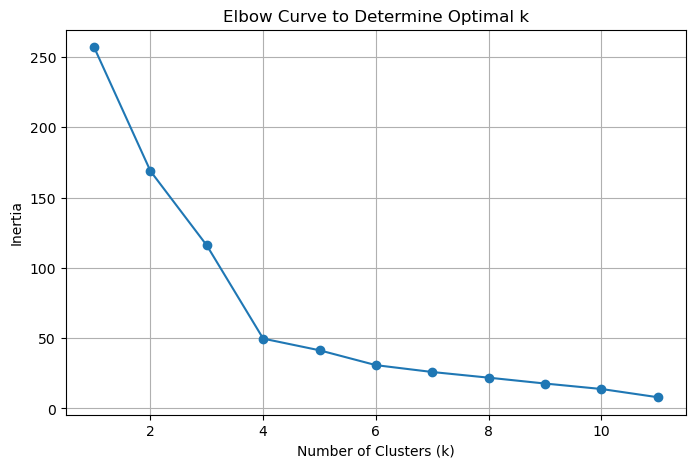

In [55]:
import matplotlib.pyplot as plt

# Plot a line chart with the inertia values
plt.figure(figsize=(8, 5))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')

# Add title and labels to the plot
plt.title('Elbow Curve to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Show the plot
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [58]:
from sklearn.cluster import KMeans

# Best value for k (assumed to be 4 based on the Elbow curve analysis)
best_k = 4

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the PCA-transformed data (PC1, PC2, PC3)
kmeans_model.fit(df_pca[['PC1', 'PC2', 'PC3']])

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the df_pca DataFrame
df_pca['Cluster'] = cluster_labels

# Display the first few rows with the cluster labels
print(df_pca.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [60]:
# Fit the K-Means model using the PCA data
from sklearn.cluster import KMeans

# Best value for k (assumed to be 4 based on your previous analysis)
best_k = 4

# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the PCA data (PC1, PC2, PC3)
kmeans_model.fit(df_pca[['PC1', 'PC2', 'PC3']])

KMeans(n_clusters=4, random_state=42)

In [61]:
# Predict the clusters
predicted_clusters = kmeans_model.predict(df_pca[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [62]:
# Create a copy of the DataFrame
df_pca_copy = df_pca.copy()

# Add a new column with the predicted clusters
df_pca_copy['Cluster'] = predicted_clusters

# Display sample data to check the updated DataFrame
print(df_pca_copy.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [63]:
import hvplot.pandas  # Ensure hvPlot is imported

# Create a scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',  # Color points by cluster label
    hover_cols=['coin_id'],  # Add crypto names to hover info
    title='K-Means Clustering of Cryptocurrencies (PCA-Reduced Data)',
    xlabel='PC1',
    ylabel='PC2',
    colormap='Category10'  # Use a colormap to differentiate clusters
)

# Display the plot
scatter_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

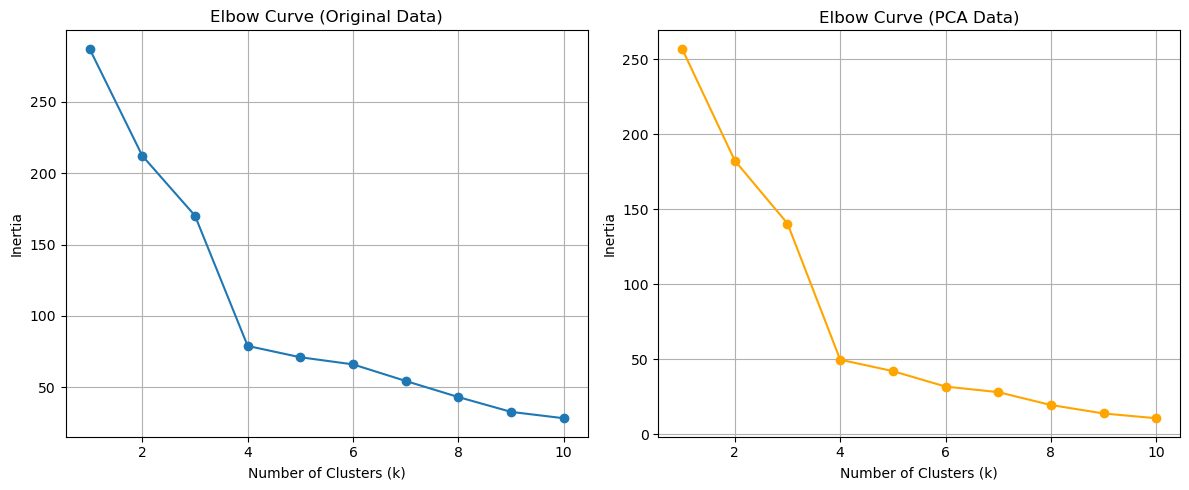

In [65]:
# Composite plot to contrast the Elbow curves

# Range of k values to test
k_values = range(1, 11)

# List to store inertia values for original data
inertia_original = []

# Compute inertia for different k values using original data
for k in k_values:
    kmeans_original = KMeans(n_clusters=k, random_state=42)
    kmeans_original.fit(df_scaled_market_data)  # Assuming df_scaled_market_data is your original data
    inertia_original.append(kmeans_original.inertia_)

# List to store inertia values for PCA data
inertia_pca = []

# Compute inertia for different k values using PCA data
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(df_pca[['PC1', 'PC2', 'PC3']])  # Assuming df_pca contains your PCA-transformed data
    inertia_pca.append(kmeans_pca.inertia_)

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Elbow Curve for original data
ax[0].plot(k_values, inertia_original, marker='o')
ax[0].set_title('Elbow Curve (Original Data)')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

# Plot Elbow Curve for PCA data
ax[1].plot(k_values, inertia_pca, marker='o', color='orange')
ax[1].set_title('Elbow Curve (PCA Data)')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Inertia')
ax[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [70]:
# Composite plot to contrast the clusters
from sklearn.cluster import KMeans

# Best value for k (from your previous analysis)
best_k = 4

# K-Means on the original (non-PCA) scaled data
kmeans_original = KMeans(n_clusters=best_k, random_state=42)
kmeans_original.fit(df_scaled_market_data)  # Assuming df_scaled_market_data is your original scaled data

# Predict clusters for the original data
predicted_clusters_original = kmeans_original.predict(df_scaled_market_data)

# Create a copy of the original data to store the predicted clusters
df_original = df_market_data_copy.copy()  # Assuming df_market_data_copy is your original dataset
df_original['Cluster'] = predicted_clusters_original

# Add PCA-like columns (or just use the original data's first two features for visualization)
df_original['PC1'] = df_scaled_market_data.iloc[:, 0]  # First column
df_original['PC2'] = df_scaled_market_data.iloc[:, 1]  # Second column

import hvplot.pandas  # Ensure hvPlot is imported

# Scatter plot for the original data (no PCA)
scatter_original = df_original.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    hover_cols=['coin_id'],  # Assuming you have a 'coin_id' column in df_original
    title='Clusters Without PCA',
    xlabel='Feature 1 (Original)',
    ylabel='Feature 2 (Original)',
    colormap='Category10'
)

# Scatter plot for the PCA data
scatter_pca = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    hover_cols=['coin_id'],
    title='Clusters With PCA',
    xlabel='PC1',
    ylabel='PC2',
    colormap='Category10'
)

# Combine the two scatter plots into a composite plot
composite_plot = scatter_original + scatter_pca

# Display the composite plot
composite_plot.cols(2)  # Display the plots side-by-side

:Layout
   .Scatter.I  :Scatter   [PC1]   (PC2,Cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA simplifies the data and often results in clearer, more interpretable clusters. However, this comes at the cost of losing some level of detail, which might affect the accuracy of the clustering in more complex datasets.